# Regresión lineal Simple
## Econometría I, Facultad de Economía
* **

En este Colab estudiaremos los conceptos más básicos de python tales como
* **Tipos de datos**
* **Cómo declarar variables**
* **Librerías**

por lo tanto, ya que tenemos los conceptos teóricos de la clase, crearemos nuestra primera regresión usando comandos de python de la forma más fácil posible.


🔑 **Nota**: Do not worry if you do not understand every single concept, if any doubt do not hestitate to ask us during class.

# 1. Teoría

La ecuación
\begin{equation}
y = mx+b
\end{equation}
se transforma en esto
\begin{equation}
y = \beta_{0} + \beta_{1} X
\end{equation}
donde $\beta_{0}$ y $\beta_{1}$ son los coeficientes de regresión.

Queremos estimas estos coeficientes para poder obtener la ecuación que nos arroje valores particulares para $y$ dadas nuevas entradas de $X$



🔑 **Note_** En regresión lineal múltiple tenemos
\begin{equation}
y = \beta_{0} + \beta_{1} X_{1} + \beta_{2} X_{2}
\end{equation}
y así con cuantas variables independientes queramos.

Podemos estimar los coeficientes tal que
\begin{equation}
\beta_{1} 
\end{equation}
y escrito en código queda como: `B1 = sum((x(i) - mean(x)) * (y(i) - mean(y))) / sum( (x(i) - mean(x))^2 )`

y
\begin{equation}
\beta_{0} 
\end{equation}
escrito en código queda como: `B0 = mean(y) - B1 * mean(x)`

🚨 Como nota final, seguiremos los pasos del **cílco del data analysis**, como se observa en la siguiente imagen:


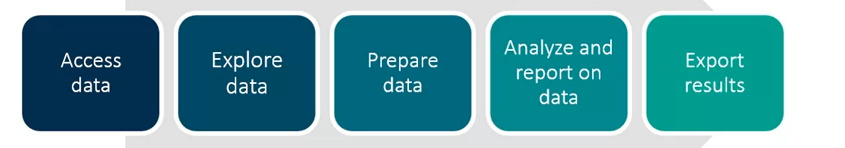

# 2. Access Data

Obtenemos los datos de un archivo .csv que está alojado en un [Repositorio de GitHub](https://github.com/milioe/Econometrics) 

Después, usamos el comando de linux `wget` con un signo `!` como se muestra en la siguiente celda:

In [13]:
!wget https://raw.githubusercontent.com/milioe/Econometrics/main/Salary_Data.csv

--2022-02-16 22:34:02--  https://raw.githubusercontent.com/milioe/Econometrics/main/Salary_Data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 487 [text/plain]
Saving to: ‘Salary_Data.csv.1’

Salary_Data.csv.1   100%[===================>]     487  --.-KB/s    in 0s      

2022-02-16 22:34:03 (26.1 MB/s) - ‘Salary_Data.csv.1’ saved [487/487]



Usaremos algunas librerías comunes tal como `pandas`, `numpy` y `matplotlib`. Una librería es una **"bolsa"** en donde hay código que nos puede resultar útil, es decir, es una forma de no tener que escribir una función para poder sacar una media desde cero, sino que ya viene integrada en librerías. 

In [14]:
import pandas as pd # para leer .csv / "as pd" significa recortar la palabra para no poner "pandas" siempre
import numpy as np # librería para modificación matemática de arreglos
import matplotlib.pyplot as plt # librería para gráficar

# nota: no tenemos que instalar nada de forma local, las principales librerías están 

# 3. Explore Data

Vamos a traer los datos en una variables llamada `df`


In [15]:
df = pd.read_csv("Salary_Data.csv")

Ya que tenemos el pandas dataframe agregado en una variable llamada `df`, mostraremos las primeras 5 observaciones con el método `.head()`

Nota como se lo "agregamos" al objeto `df`; es como si tuviera una propiedad a la cual mandamos a llamar con un punto `.`

In [16]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


# 4. Prepare Data

Ahora particionaremos el data set en nuestra variable independiente `YearsExperience` y nuestra variable dependiente `Salary`.

`X` será el nombre del objeto de la variable independiente y `y` el nombre de la variable dependiete.



In [17]:
X = df["YearsExperience"]

y = df["Salary"]

In [18]:
X.head()

0    1.1
1    1.3
2    1.5
3    2.0
4    2.2
Name: YearsExperience, dtype: float64

In [19]:
y.head()

0    39343.0
1    46205.0
2    37731.0
3    43525.0
4    39891.0
Name: Salary, dtype: float64

# 5. Analye data

Para ver la longitud de un objeto utilizaremos la función `len`

In [20]:
len(X)

30

Podemos ver que tenemos 30 observaciones. Ahora bien, ese dato no está guardado en ningún lugar, sólo se imprimio. Para ello, utilizaremos una variable (espacio de trabajo) llamdo `n` y le asignaremos la función `len()`

In [21]:
n = len(X)

In [22]:
# imprimimos n
n

30

A partir de ahora calcularemos lo necesario para realizar la regresión

In [31]:
# suma de elemento en X
sumx = sum(X)

In [32]:
# suma de elementos en y
sumy = sum(y)

In [33]:
# suma de cuadrados
sumx2 = sum(X*X)
sumy2 = sum(y*y)

In [34]:
# suma de X * y
sumxy = sum(X*y)

In [35]:
# promedios
promx = sumx/n

promy = sumy/n

## 5.1 Obtención de la recta

Recuerden que todo se basa en
\begin{equation}
y = mx + b
\end{equation}

por lo tanto, sabiendo eso, tenemos que crear cada objeto para integrarlo en la ecuación, es decir, hacer `m`, hacer `x` y hacer `b`

In [37]:
# definiremos m el cual como habíamos visto antes es
m = (sumx*sumy - n*sumxy) / (sumx**2 - n*sumx2)

In [38]:
# Ahora bien, obtendremos b
b = promy - m*promx

Recuerda que lo que se sustituye es $x$ en la ecuación anterior, por tanto, ya tenemos `x` y `y` como dataframes, y también tenemos `m` y `b` como objetos que calculamos nosotros por nuestra cuenta.

Lo único que nos hace falta es revisar la parte gráfica.

# 6. Report  

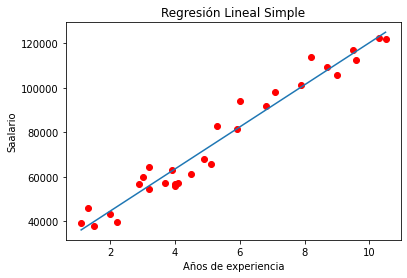

In [42]:
# Definimos un scatter, es decir, un g´rafico de dispersión. Le pasamos X  y y que son nuestros dataframes. Queremos los puntos de color rojo y por ello ponemos "red"
plt.scatter(X,y, color="red")
# Ahora graficareos la recta, es aquí donde aplicamos nuestra recta con las variables que creamos
plt.plot(X, m*X+b, label="Ajuste")

# Ponemos una etiqueta al eje x (por eso el método .xlabel con un punto se utiliza)
plt.xlabel("Años de experiencia")
# ahora lo mismo para el eje y
plt.ylabel("Saalario")
# un título para el gráfico
plt.title("Regresión Lineal Simple")
#plt.grid() # esta opción es por si queremos grid en la gráfica, de lo contrario simplemente comentala
plt.legend
plt.show(); # finalmente la mostramos 

Ahora bien, queremos calcular $R^{2}$

In [43]:
sigmax = np.sqrt(sumx2/n - promx**2)
sigmay = np.sqrt(sumy2/n - promy**2)
sigmaxy = sumxy/n - promx*promy
R2 = (sigmaxy/(sigmax*sigmay))**2

In [56]:
print(f"La precisión de nuestro modelo es de {np.round(R2*100, 3)}%")

La precisión de nuestro modelo es de 95.696%


Finalmente, nos preguntaramos lo siguiente 

* Si alguien que tiene sólo un año de experiencia, ¿Cuánto se espera ganar?

In [44]:
# para ello se asigna una variable llamada pronostico donde sustituyendo se tiene que
pronostico = b + (m*1)

In [48]:
print(f"Una persona con un año de experiencia ganaría aproximadamente ${np.round(pronostico,2)} de acuerdo a nuestro modelo")

Una persona con un año de experiencia ganaría aproximadamente $35242.16 de acuerdo a nuestro modelo


# References


* [How To Implement Simple Linear Regression From Scratch With Python](https://machinelearningmastery.com/implement-simple-linear-regression-scratch-python/)

